# Classificatoion and Logistic regression
In classification problem we are trying to predict the $y$-labels value based o given data, except (the regression problem) this time they are $\underline{discrete}$. E.g. $y \in \{-1,1\}$, which may represent the customer that liked the product or didn't.

### a) Logistic regression
Let's asume that our classification is $y \in \{0,1\}$.
This time we would like to choose such a hypothesis function that does not take larger nor lower values than 0 and 1. So our hypothesis is <br> 
<center>$h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}$</center>
If we take $z = \theta^T x$, than 
<center>$h_\theta(x) = g(z) = \frac{1}{1 + e^{-z}}$</center>
still $\theta^T x = \theta_0 + \sum_{i=1}^{d} \theta_i x_i$ <br>
As an exercise try to find $\frac{d}{dz}g$ and express it using $g(z)$.

We have our model that seems to have desired properties, but how do we find the $\theta$ that satisfies most our data? <br>
Let us make some probabilistic assumptions <br>
<center>$\mathbb{P}(y=1|x,\theta) = h_\theta (x)$</center>
<center>$\mathbb{P}(y=0|x,\theta) = 1-h_\theta (x)$</center>
<center></center>
We can for simplicity write it as
<center>$p(y|x,\theta) = (h_\theta(x))^y \cdot ((1-h_\theta)(x))^{1-y}$</center>
Does it seem famirial? <br>
Let's try to find the optimum $\theta$ via maximum likelihood function. We asume that $n$ of samples form our data set $X$ are iid, so we have
<center>$L(\theta) = p(\vec{y} |X,\theta) = \prod_{i=1}^n (h_\theta(x^{(i)}))^{y^{(i)}} \cdot ((1-h_\theta)(x^{(i)}))^{1-y^{(i)}}$</center>
The best way to find maximum of $L$ is to rewrite it as $l(\theta) = \log L(\theta) = \sum_{i=1}^n \log (h_\theta(x^{(i)}))^{y^{(i)}} + \log ((1-h_\theta)(x^{(i)}))^{1-y^{(i)}}$. This way it's a lot easier. <br> To maximize it we will use the gradient ascent 
<center>$\theta \leftarrow \theta + \alpha \nabla l(\theta)$ </center>
The difrence form gradient descent is plus sing :) If we look at $j$th partial derivative for one training  example and solve it. We surprisingly get
<center>$\frac{\partial}{\partial \theta_j} l({\theta}) = (y-h_\theta (x))x_j$</center>
This give us the Stochastic Gradient Ascent (SGA) rule, where we update
<center>$\theta \leftarrow \theta + \alpha (y^{(i)}-h_\theta (x^{(i)}))x^{(i)} $</center>

#### Example toy_sample
Let's play some with this data.

In [76]:
#toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
labels = ["labels","feature0", "feature1"]
df = pd.read_csv("toy_data.tsv", sep='\t')
df.columns = labels
df

,labels,feature0,feature1
0,-1,0.979,2.240
1,-1,1.870,-0.977
2,-1,0.950,-0.151
3,-1,-0.103,0.411
4,-1,0.144,1.450
...,...,...,...
194,1,2.570,1.780
195,1,1.650,0.384
196,1,1.710,1.240
197,1,2.860,3.140


In [108]:
# we assign our labels and data set so they match our assumpotions
# such as D = (xi, yi), xi = (x_0, x_1,...,x_d), x_0 = 1, D = [X,y]
# but we will assure this in SGA implementation
# assign the amount of data and dimensions of vectors
N, D = df.shape
#print(N,D)
#container for lables
y = np.array(df["labels"])
x0 = np.ones(N)
x1 = np.array(df["feature0"])
x2 = np.array(df["feature1"])
#container for training set matching our model
X = np.column_stack((x1,x2))

#print(y,x0,x1)


Note: I am doing here two same plots. But each approach is a bit different. May anylize how :)
<br> 1st approach

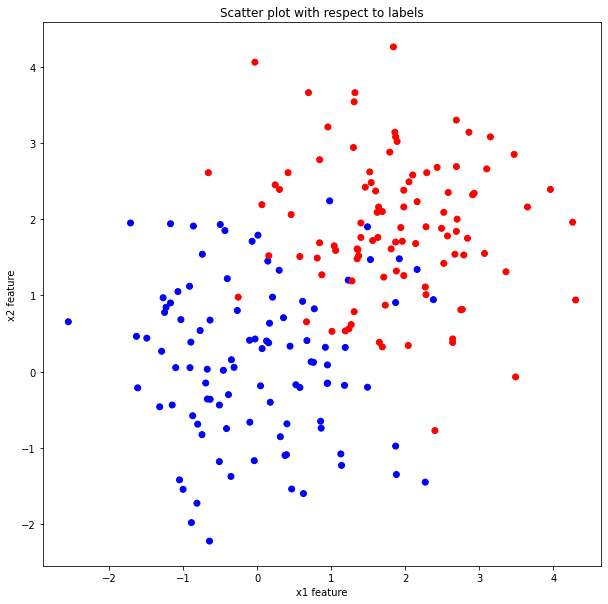

In [145]:
# we assign colors for y = -1 : blue, y = 1 : red
label_colors = {-1:'b',1:'r'}
y_labels_colors = [label_colors[label] for label in y]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x1,x2,c=y_labels_colors)
# naming axes
ax.set_xlabel('x1 feature')
ax.set_ylabel('x2 feature')
ax.set_title('Scatter plot with respect to labels')
# visualize plots
plt.show()


2nd approach

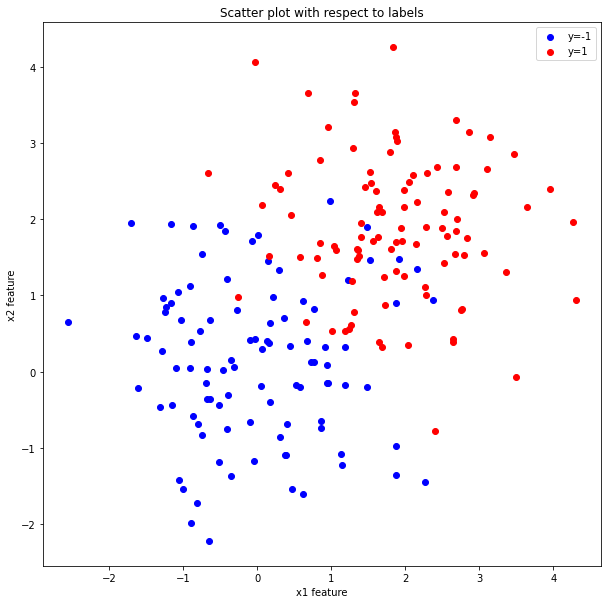

In [110]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.scatter(x1[y==-1],x2[y==-1],c='b',label="y=-1")
ax1.scatter(x1[y==1],x2[y==1],c='r',label="y=1")
ax1.legend()
# naming axes
ax1.set_xlabel('x1 feature')
ax1.set_ylabel('x2 feature')
ax1.set_title('Scatter plot with respect to labels')
# visualize plots
plt.show()

We will implement the SGA on above training set and see how presice it can be. As we already seen the SGA is very similar to GDA

In [160]:
# we implement SGA
# inputs must by np.arrays
def sga(data,labels,grad_fn,alpha,iter_grad):
    N = data.shape[0]
    x0 = np.ones(N)
    # 1st we must asure that x's in data
    # are this x = (1,x1,x2,...,xd)
    data = np.column_stack((x0,data))
    N, D = data.shape
    # dimension of theta must be equal to dim. of x
    # initialize theta
    theta = data[0]
    theta_list = [data[0]]
    for t in range(iter_grad):
        for i in range(N):
            # we make an udate each step
            theta += alpha*grad_fn(data[i],labels[i],theta)
            theta_list.append(theta.copy())
    return np.array(theta_list)
# we difine our learning hypothesis and its gradient
# h_lreg = 1/(1+exp(-z))
h_lreg = lambda x,theta:1/(1+np.exp(-np.dot(x,theta)))
grad_h_lreg = lambda x,y,theta: (y-h_lreg(x,theta))*x
#print(X.shape)
theta_learnd = sga(X,y,grad_h_lreg,0.01,1000)
#print(theta_learnd)

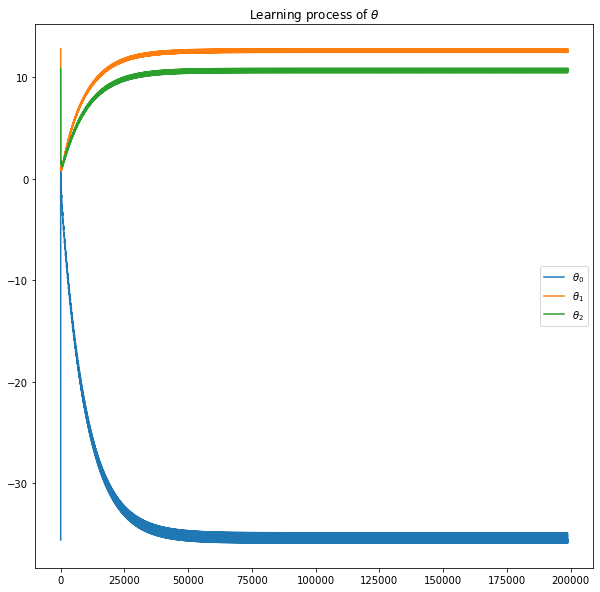

In [161]:
fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.plot(theta_learnd[:,0],label=r"$\theta_0$")
ax2.plot(theta_learnd[:,1],label=r"$\theta_1$")
ax2.plot(theta_learnd[:,2],label=r"$\theta_2$")

ax2.set_title(r"Learning process of $\theta$")
ax2.legend()

Our learning process is converging, its a good sign, it means our theta is trying to be the most optimate in respect to given training set. Let see how good it will work on it. This time, for simplicity above data set is also a test set.

In [162]:
Data_set = np.column_stack((x0,x1,x2))
trained_y = np.array([h_lreg(x,theta_learnd[-1]) for x in Data_set])
trained_labels = trained_y
trained_y = np.round(trained_y)
trained_y[trained_y == 0] = -1
trained_y


array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1

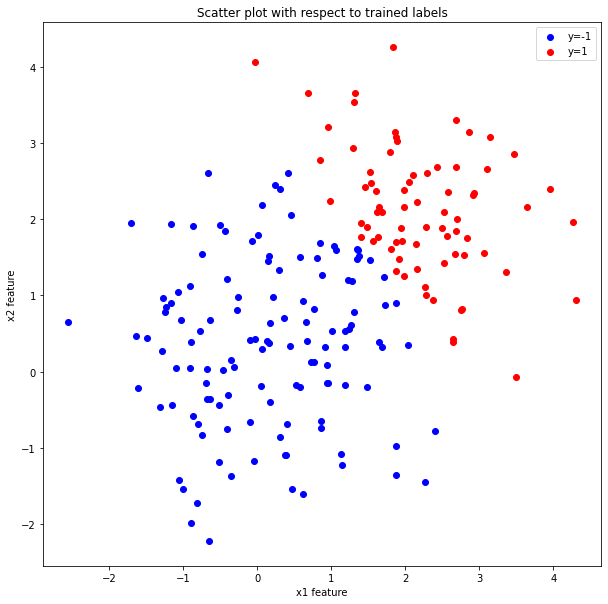

In [163]:
fig3, ax3 = plt.subplots(figsize=(10,10))
ax3.scatter(x1[trained_y==-1],x2[trained_y==-1],c='b',label="y=-1")
ax3.scatter(x1[trained_y==1],x2[trained_y==1],c='r',label="y=1")
ax3.legend()
# naming axes
ax3.set_xlabel('x1 feature')
ax3.set_ylabel('x2 feature')
ax3.set_title('Scatter plot with respect to trained labels')
# visualize plots
plt.show()

Result on the first sight seems ok, but is it a well trained model? Let's compare those ours two plots.

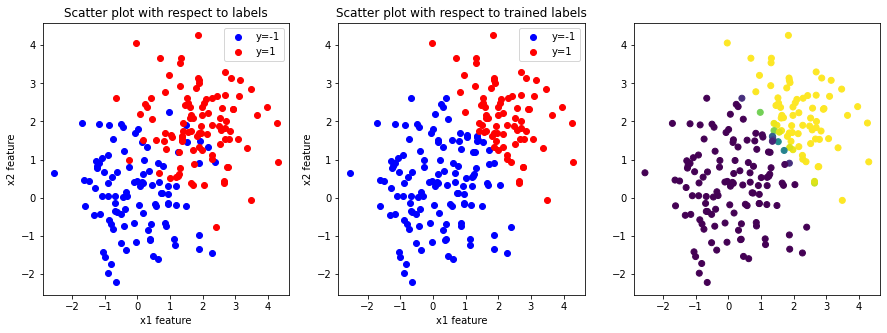

In [164]:
fig4, (ax4_1, ax4_2, ax4_3) = plt.subplots(nrows = 1, ncols = 3,figsize=(15,5))
ax4_1.scatter(x1[y==-1],x2[y==-1],c='b',label="y=-1")
ax4_1.scatter(x1[y==1],x2[y==1],c='r',label="y=1")
ax4_1.legend()
# naming axes
ax4_1.set_xlabel('x1 feature')
ax4_1.set_ylabel('x2 feature')
ax4_1.set_title('Scatter plot with respect to labels')

ax4_2.scatter(x1[trained_y==-1],x2[trained_y==-1],c='b',label="y=-1")
ax4_2.scatter(x1[trained_y==1],x2[trained_y==1],c='r',label="y=1")
ax4_2.legend()
# naming axes
ax4_2.set_xlabel('x1 feature')
ax4_2.set_ylabel('x2 feature')
ax4_2.set_title('Scatter plot with respect to trained labels')


ax4_3.scatter(x1,x2,c=trained_labels)



We obeserve that oyr model missclassifies. There is a few of outlayering data, which doesn't work well for learning process.